In [1]:
import numpy as np
from scipy.sparse import coo_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [2]:
kijz = list(range(0,15))

In [20]:
dic = {}
random.seed(0)
for i in range(0,15):
    key = kijz[i]
    l = random.sample(range(0,40), random.randint(1,6))
    dic[key] = l

In [21]:
for key in dic.keys():
    print("Page", key, ": Users ", dic[key])

Page 0 : Users  [26, 2, 16, 32]
Page 1 : Users  [25, 19, 30, 22]
Page 2 : Users  [13, 32, 8, 18, 6]
Page 3 : Users  [16, 34, 38, 9, 19]
Page 4 : Users  [4]
Page 5 : Users  [21, 30, 35, 6, 22, 27]
Page 6 : Users  [39, 13, 35]
Page 7 : Users  [28, 33, 16, 3]
Page 8 : Users  [0, 5, 25, 39, 31]
Page 9 : Users  [15, 20, 4]
Page 10 : Users  [36, 14]
Page 11 : Users  [9, 34]
Page 12 : Users  [5, 20, 32, 31]
Page 13 : Users  [19]
Page 14 : Users  [18, 7, 35, 21, 34]


In [28]:
r = 0 # the index of the row of the matrix
c = 0 # the index of the columns of the matrix
row_indices = []
column_indices = []
matrix_elements = []

for key_r in dic.keys(): # key_r is the key for the rows
    x = dic[key_r]
    for key_c in dic.keys(): # key_c is the key for the columns
        if c >= r:
            y = dic[key_c]
            common_set = list(set(x) & set(y))
            common_set_size = len(common_set)
            if common_set_size > 0:
                row_indices.append(r)
                column_indices.append(c)
                matrix_elements.append(common_set_size)
        c = c + 1
    r = r + 1
    c = 0

In [29]:
row  = np.array(row_indices)
col  = np.array(column_indices)
val = np.array(matrix_elements)
mx = coo_matrix((val, (row, col)), shape=(15, 15)).toarray()
mx

array([[4, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 4, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 5, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 6, 1, 0, 0, 0, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5]])

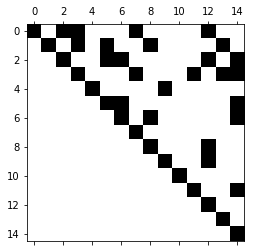

In [24]:
plt.spy(mx)
plt.show()

In [25]:
row_indices_2 = row_indices
column_indices_2 = column_indices
matrix_elements_2 = matrix_elements

for i in range(0, len(row_indices)):
    if row_indices[i] != column_indices[i]:
        column_indices_2.append(row_indices[i])
        row_indices_2.append(column_indices[i])
        matrix_elements_2.append(matrix_elements[i])

In [26]:
row2  = np.array(row_indices_2)
col2  = np.array(column_indices_2)
val2 = np.array(matrix_elements_2)
mx2 = coo_matrix((val2, (row2, col2)), shape=(15, 15))
mx2

<15x15 sparse matrix of type '<class 'numpy.int32'>'
	with 63 stored elements in COOrdinate format>

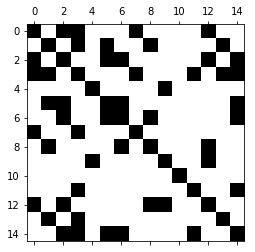

In [27]:
plt.spy(mx2.toarray())
plt.show()